# **High-Frequency Quasi-Periodic Oscillations in the Solar Corona Observed with High-Frame-Rate Imaging During the 2023 Total Solar Eclipse**
### **Data Processing and Analysis Notebook**

**Authors**: [Yu Liang]
**Affiliation**: [Shanghai Astronomical Observatory, Chinese Academy of Sciences, Shanghai 200030, China]  
**Contact**: [yuliang@shao.ac.cn]  
**Last Updated**: [2024-12-10]  

---

### **Notebook Overview**

These Jupyter Notebook documents the processing and analysis of observational data collected during the 2023 total solar eclipse. The primary objectives of this Notebook include:

1. Preprocessing of raw white-light corona imaging data (dark field subtraction, flat field correction, and temporal registration).
2. Application of wavelet analysis to detect high-frequency quasi-periodic oscillations (HFQPOs).
3. Visualizations of the solar corona and statistical results for Sun-as-a-star analysis.

---

### **Dependencies**

The analysis relies on the following Python libraries (compatible versions):  
- `numpy==1.2.43`  
- `pandas==1.5.1`  
- `scikit-image==0.20.0`  
- `matplotlib==3.7.1`  
- `astropy==5.1.1`  
- `opencv-python==4.7.0.72`  
- `Pillow==9.2.0`  
- `scipy==1.13.1`  


<!-- A complete list of dependencies can be found in the accompanying `requirements.txt`. -->

---

### **Data Source**

- **Observation Site**: Learmonth Airport, Australia  
- **Instrument**: iPhone with 565 nm filter, sampling at 240 fps, frams width * height: 720.0 * 1280.0, image shape:(1280, 720, 3)  
- **Date**: April 20, 2023  

---

### **Main Structure**

- **Section 1**: Data loading and inspection  
- **Section 2**: Preprocessing (dark field, flat field, and registration)  
- **Section 3**: Wavelet analysis and signal detection  
- **Section 4**: Results visualization and discussion  

---
### **Notebook figure - plot of the wavelet analysis results**

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
['./output/R1.1.png', './output/R1.5.png', './output/R2.0.png', './output/R2.5.png', './output/R3.0.png', './output/R3.5.png', './output/R4.0.png', './output/R4.5.png', './output/R5.0.png', './output/R5.5.png', './output/R6.0.png', './output/R6.5.png', './output/R7.0.png', './output/R7.5.png', './output/R8.0.png', './output/R8.5.png', './output/R9.0.png', './output/bkg.png']


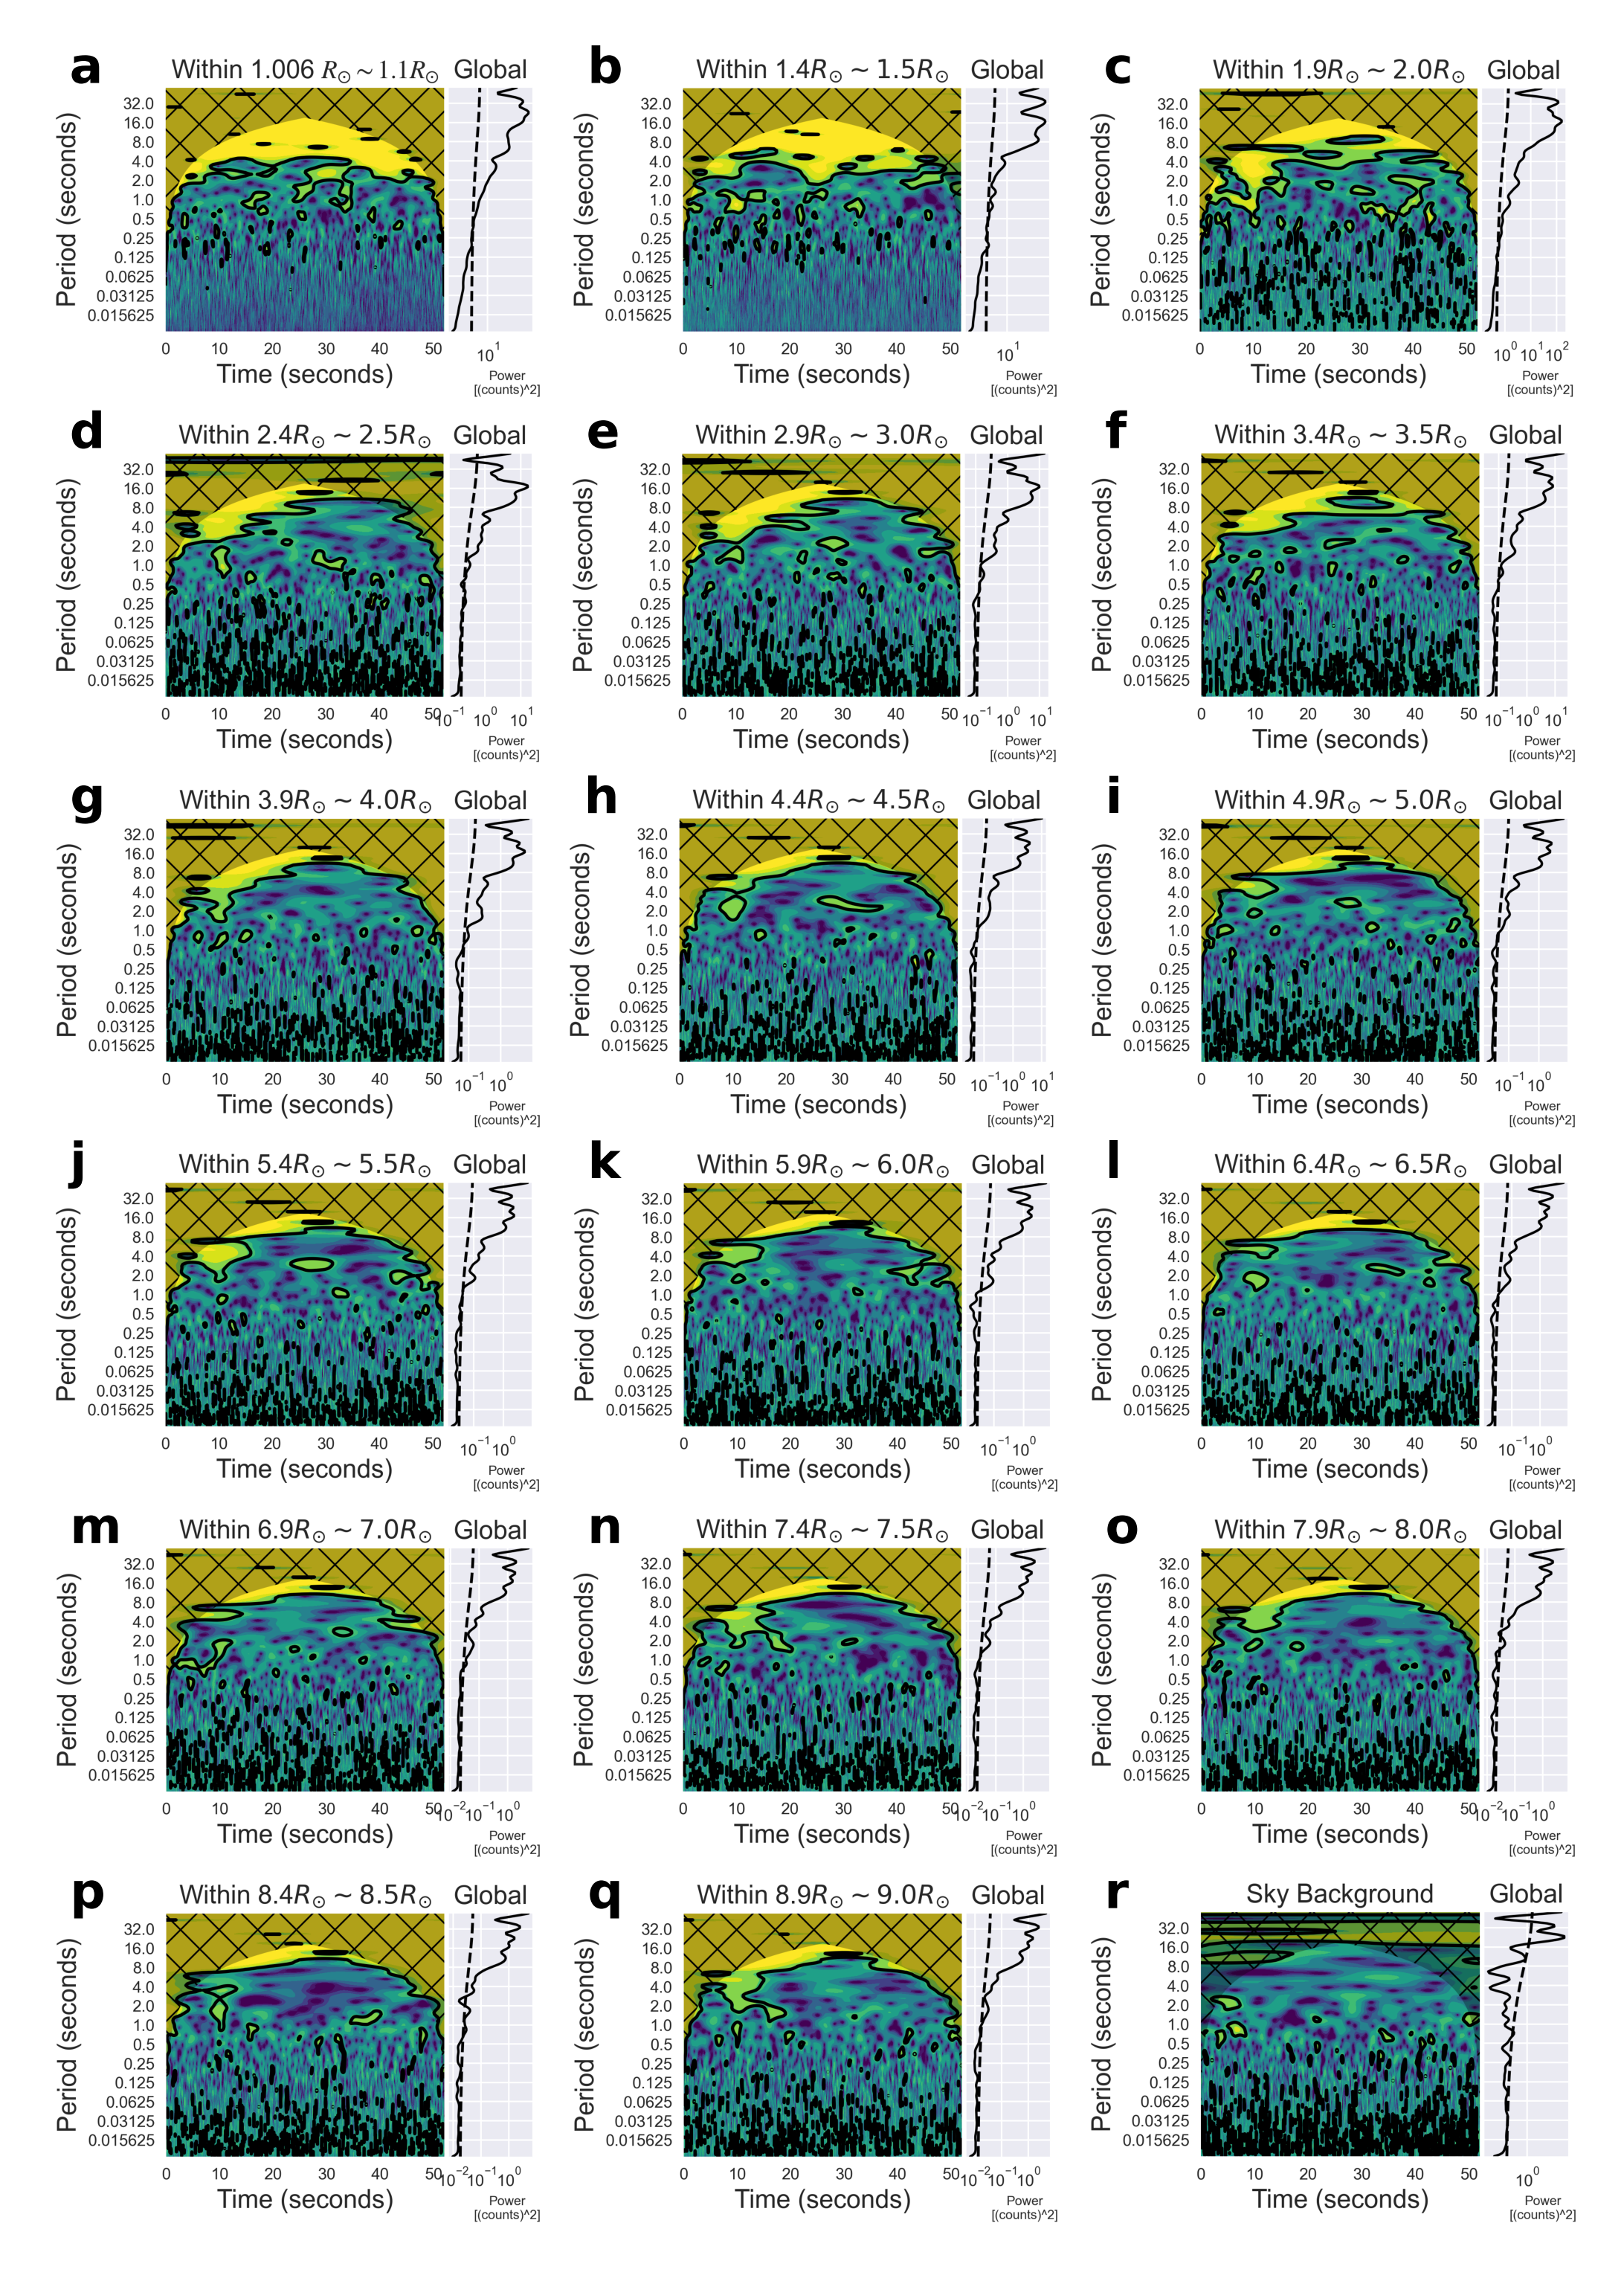

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patheffects as path_effects

# Subplot file paths
images = ['./output/R1.1.png'] + [f"./output/R{value:.1f}.png" for value in [1.5 + 0.5 * i for i in range(16)]] + ['./output/bkg.png']

print(images)

# Create canvas and subplots
fig, axes = plt.subplots(6, 3, figsize=[3.54, 5], dpi=600)

# Load and display images
for idx, (ax, img_path) in enumerate(zip(axes.flat, images)):
    try:
        img = mpimg.imread(img_path)  # Load image
        ax.imshow(img)  # Display image
        ax.axis('off')  # Hide axes

        # Add subplot label inside the image
        label = chr(97 + idx)  # Generate labels: a, b, c, ...
        ax.text(
            0.05, 0.9, label, transform=ax.transAxes, fontsize=8, fontweight='bold', color='black',
            path_effects=[path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()]
        )
    except FileNotFoundError:
        ax.text(
            0.5, 0.5, "Image not found", transform=ax.transAxes, fontsize=8, color='red',
            ha='center', va='center'
        )
        ax.axis('off')

# Adjust subplot spacing
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.01, hspace=0.01)

# Save and show the figure
savepath = './output/'
plt.savefig(savepath + 'wvs.png', bbox_inches='tight')
plt.show()
